# Machine Learning Course Assignment - 3



This notebook  contains starter code for third assignment of Generative-Algorithms based classification using [Scikit-learn](https://scikit-learn.org/) library.

This assignment follows standard ML workflow.
1. Load dataset
2. Explore dataset
3. Preprocessing
4. Build a Naive Bayes Classifier
5. Train model on training data
6. Prediction on test data
7. Model Evaluation

Your are required to complete required tasks in corresponding cells. Reference of necessary functions is also provided. Make sure you understand all functions with parameters before using them.


# 1- Load dataset
Load  'loan' dataset from `loan_data.csv` file using pandas library function
[read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).

Task # 1: Load csv file using pandas `read_csv` function.

In [1]:
import pandas as pd
show= pd.read_csv(r"       \loan_data.csv")

print(show.head())


   credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0   

# 2- Data Exploration
To understand more about the dataset we will use `.info()` function on dataset object. Furhter details are available at [info()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html)

* The dataset consists of 14 columns and 9578 rows.
* Apart from “purpose”, columns are either floats or integers.
* Our target column is “not.fully.paid”.

Task # 2: using pandas `info` function print dataset information.




In [2]:
import numpy as np

print(show.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB
None


Here is the detail of various columns.
The target variable is `not.fully.paid`.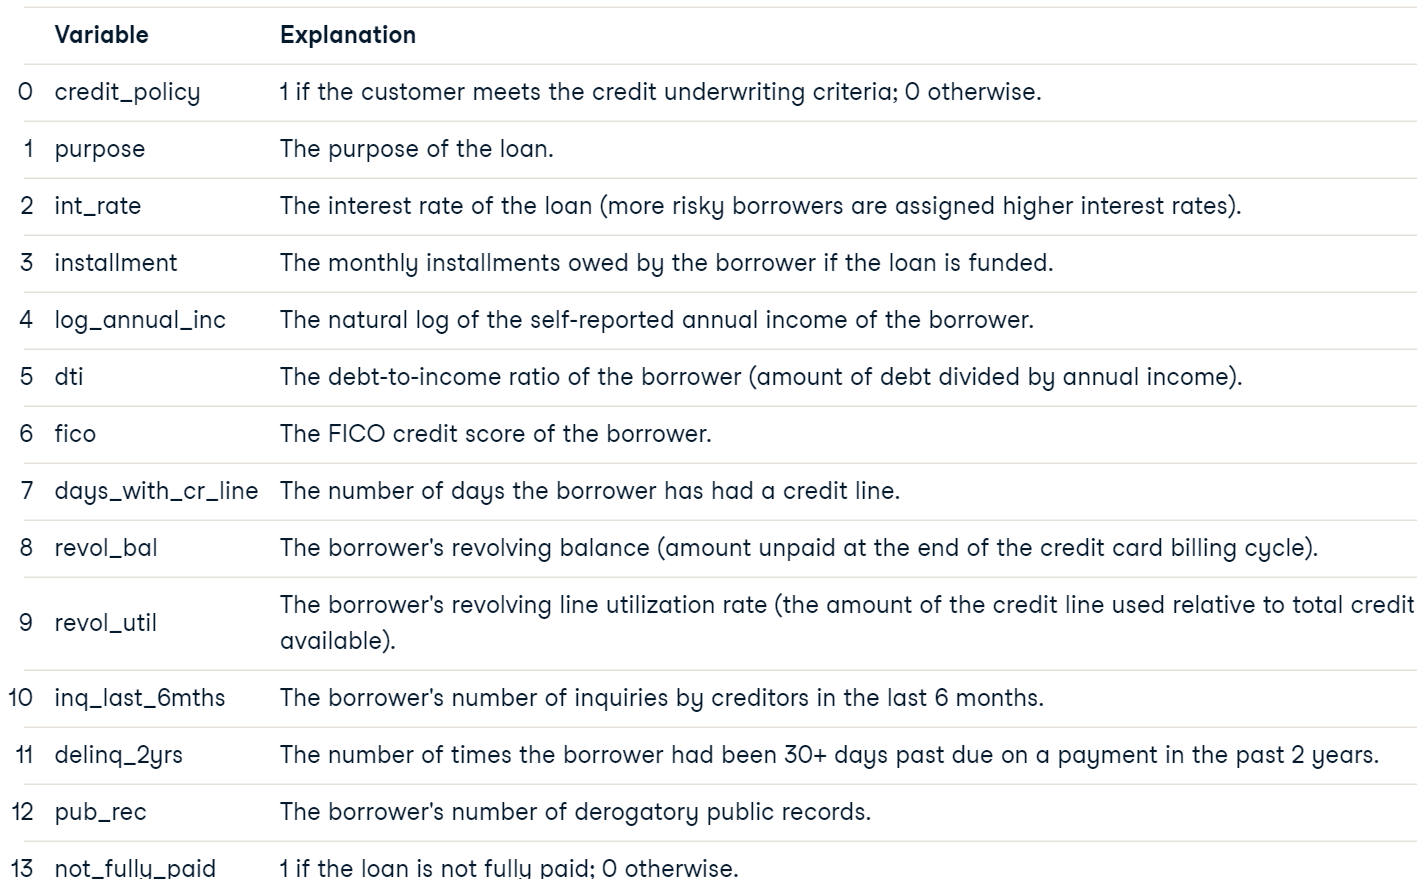

First five rows of dataset can be views using `head` function on dataset object. Details are available at [head()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html)

Task # 3: Using pandas `head` function, show first records of data.

In [3]:

print(show.head())

   credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0   

### Data Visualisation


The easiest way for visualisation can be histograms. In following cell we are trying to make a histogram of target variable, this will provide us the number of total examples in each class. The [matplotlib](https://matplotlib.org/stable/index.html) library provides various functionality for plotting. The details of of the required function is available at
[hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html).

Task 4: Create a histogram of `not.fully.paid` column with `2` bins using `plt.hist()` function with required parameters.

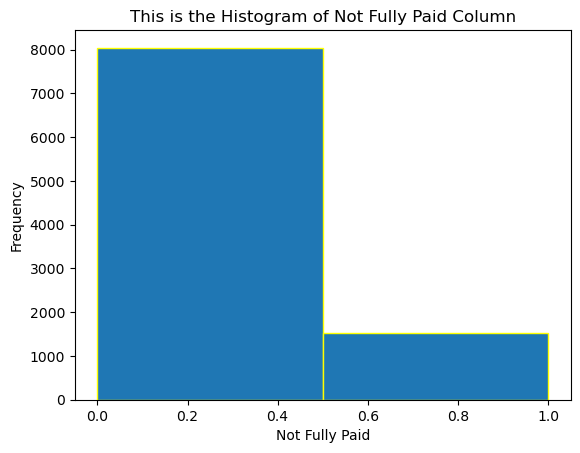

In [4]:
from matplotlib import pyplot as plt



plt.hist(show['not.fully.paid'], bins=2, edgecolor='yellow')


plt.xlabel('Not Fully Paid')
plt.ylabel('Frequency')
plt.title('Histogram of Not Fully Paid')

plt.show()



# 3 - Preprocessing
As in dataset we have only one column  ‘purpose’ text. We will now remove this column from data  using pandas `drop` function.
[drop()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html)

Task 5: Using pandas `drop()` function to remove 'purpose' column.

In [5]:
#Drop the 'purpose' coloumn
show = show.drop(columns=['purpose'])
print(show.head())

   credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0              1    0.1189       829.10       11.350407  19.48   737   
1              1    0.1071       228.22       11.082143  14.29   707   
2              1    0.1357       366.86       10.373491  11.63   682   
3              1    0.1008       162.34       11.350407   8.10   712   
4              1    0.1426       102.92       11.299732  14.97   667   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0        5639.958333      28854        52.1               0            0   
1        2760.000000      33623        76.7               0            0   
2        4710.000000       3511        25.6               1            0   
3        2699.958333      33667        73.2               1            0   
4        4066.000000       4740        39.5               0            1   

   pub.rec  not.fully.paid  
0        0               0  
1        0               0  
2        0             

In real world scenarios we have dedicated test set. For sake of this assignment we will split the whole dataset into training and test dataset. This can be done using `sklearn.model_selection` module's function `train_test_split`. Details are available [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

Task # 6:  Using `train_test_split` function, split the given data into 70/30% train/test.

In [6]:
from sklearn.model_selection import train_test_split

X = show.drop(columns='not.fully.paid')  
y = show['not.fully.paid']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)


Training set shape: (6704, 12) (6704,)
Testing set shape: (2874, 12) (2874,)


# 4 - Model Building
[Scikit-learn](https://scikit-learn.org/) library provides many supervised and unsupervised learning algorithms. For this assignment, we are are considering a classifier from generative models.  Scikit-learn library provides multiple implementations for  the same purpose [link](https://scikit-learn.org/stable/modules/naive_bayes.html).

Listed as:
* Gaussian Naive Bayes
* Multinomial Naive Bayes
* Complement Naive Bayes
* Bernoulli Naive Bayes
* Categorical Naive Bayes

You have to select one of them that is suitable for the dataset selected for this assignment.

Task 7: create  model using scikit-learn API.

In [7]:
from sklearn.naive_bayes import MultinomialNB

# Create multinimial Naive Bayes model
model = MultinomialNB()






# 5 - Model Training
Scikit-learn library usually provides a `fit` function for model training. You will use this function on the model object created in the previous cell by providing training data.

Task 8 : start model training using `fit` function on training data created in Task # 6.

In [8]:
# Start model training using fit function on training data
model.fit(X_train, y_train)




MultinomialNB()

# 6 - Model Prediction

Scikit-learn library provides `predict` function member of the model object, which can be used for label of unseen data i.e., test data. You will use this function by providing test data.

Task 9: using `predict` function get labels for test data created in Task # 6.

In [9]:

y_pred = model.predict(X_test)

print(y_pred)

[0 1 1 ... 0 1 1]


# 7 - Model Evaluation
The performance of the model can be evaluated on test data by using ground truth (of test data - created in Task # 6) and predicted labels (in Task # 9). Accuracy is one othe widely used metric for evaluating model's performance. This metric gives rate of correctly classified examples. Scikit-learn library prrovides you the function for calculating accuracy. The details of function is available at [accuracy_score()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html). This function takes true class/ ground truth and predicted labels.

Task 10: caluclate accuracy of the model  `accuracy_score` for test data.

In [10]:
 
from sklearn.metrics import accuracy_score
 
correct = accuracy_score(y_test, y_pred)
print("Accuracy:", correct)



Accuracy: 0.6520528879610299


Similarly,  F-1 score
[f1_score()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) can also calulated using true class / ground truth and predicted labels.

Task 11: caluclate  `f1_score` of the model for test dataset.

In [11]:
from sklearn.metrics import f1_score

# F1 score of the model on test data
f2 = f1_score(y_test, y_pred)
print("F1 Score:", f2)


F1 Score: 0.20634920634920634


Finally,  confusion matrix [confusion_matrix()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) can be computed using true class/ ground truth and predicted labels.

Task 12: caluclate `confusion_matrix` of the model for test dataset.

In [12]:
from sklearn.metrics import confusion_matrix


df = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(df)



Confusion Matrix:
[[1744  664]
 [ 336  130]]
